In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df = df.dropna()

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span = 12
alpha = 2/(span+1)

In [10]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [11]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [12]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [14]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [19]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [21]:
df.tail()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952
1960-11-01,390,475.790652,475.790652
1960-12-01,432,469.053629,NaN


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

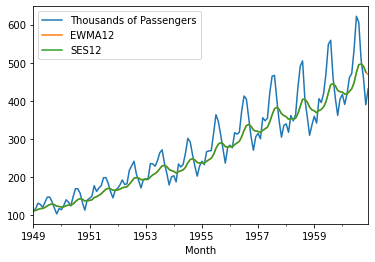

In [25]:
df.plot()

In [24]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend=)

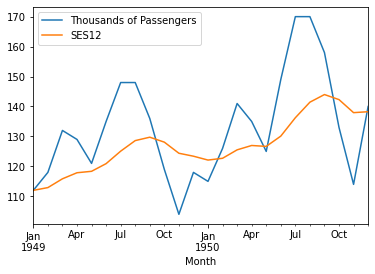

In [27]:
df[['Thousands of Passengers','SES12', 'DES_add_12']].iloc[:24].plot()